<a href="https://colab.research.google.com/github/bridgetmanu/Statisical_and-_ML/blob/main/LR_LOOCV_ROC_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import logit
from scipy.stats import chi2
from sklearn.model_selection import LeaveOneOut


# Set random seed for reproducibility
np.random.seed(1)

In [ ]:
dtrain = pd.read_csv('/content/drive/MyDrive/diabetes_train.csv')
dtest = pd.read_csv('/content/drive/MyDrive/diabetes_test.csv')
# add dtest observations to dtrain
dtrain = pd.concat([dtrain, dtest], axis=0)
#dtrain.info()

# make Outcome into categorical data
#dtrain['Outcome'] = dtrain['Outcome'].astype('category')
#print(dtrain.head())

# selects all excluding outcome variable
#dtrain_p = dtrain.iloc[:, :-1]

# selects only outcome variable
#dtrain_out = dtrain.iloc[:, -1]

# standardize the predictors
sd = StandardScaler()
d_train= sd.fit_transform(dtrain.iloc[:,:-1])

# create a new dataframe for the standardize data
d_train = pd.DataFrame(d_train, columns=dtrain.columns[:-1])
d_train.head()

# add the outcome variable to the standardized data
d_train['Outcome'] = dtrain.iloc[:, -1].values

print(d_train.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
3    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
4     0.342981 -0.153185       0.253036      -1.288212 -0.692891 -0.811341   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                 -0.920763 -1.041549        0  
3                  5.484909 -0.020496        1  
4                 -0.818079 -0.275760        0  


In [ ]:
# Logistic Regression

# Fit logistic regression with all predictors

fit_1 = logit('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + Age + DiabetesPedigreeFunction', data=d_train).fit()

# Print the summary of the first model
print(fit_1.summary())

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.2718
Time:                        03:50:26   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8711      0.097     -8.986      0.000      -1.061

In [ ]:
# New Logistic Regression Model based on stats significant predictors

fit_2 = logit('Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction + BloodPressure', data=d_train).fit()

# Print the summary of the second model
print(fit_2.summary())

# predict the training dataset
d_train2 = pd.DataFrame(d_train, columns=['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'BloodPressure', 'Outcome'])
d_train2['Outcome'] = d_train2['Outcome'].astype('category')
dtrain2_pred = fit_2.predict(d_train2.iloc[:, :-1])

# pred > 0.5: outcome = 1; pred < 0.5: outcome = 0;
dtrain2_pred = (dtrain2_pred > 0.5).astype(int)

# calculate training error rate
training_error_rate = 1 - accuracy_score(d_train2.iloc[:, -1], dtrain2_pred)
print(f'Training Error Rate: {training_error_rate}')


Optimization terminated successfully.
         Current function value: 0.474323
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.2667
Time:                        03:50:27   Log-Likelihood:                -364.28
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.442e-55
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8609      0.096     -8.968      0.000      -1.049

### Problem 2

#### Logistic Regression for all predictors

In [ ]:
# Fit logistic regression with all predictors

fit_1 = logit('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + Age + DiabetesPedigreeFunction', data=d_train).fit()

# Print the summary of the first model
print(fit_1.summary())

# predict the training dataset
dtrain_pred = fit_2.predict(d_train.iloc[:, :-1])

# pred > 0.5: outcome = 1; pred < 0.5: outcome = 0;
dtrain_pred = (dtrain_pred > 0.5).astype(int)



Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.2718
Time:                        03:50:27   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8711      0.097     -8.986      0.000      -1.061

Training Error Rate: 0.22526041666666663
[[441  59]
 [114 154]]
Sensitivity: 0.20540540540540542
Specificity: 0.7230046948356808


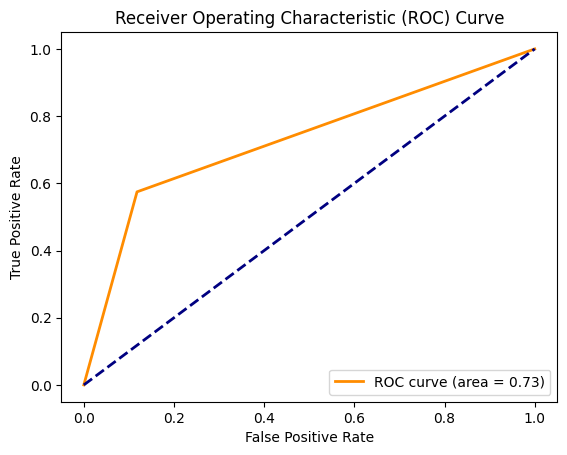

In [ ]:
# calculate training error rate
training_error_rate = 1 - accuracy_score(d_train.iloc[:, -1], dtrain_pred)
print(f'Training Error Rate: {training_error_rate}')

# confusion matrix of training data
matrix_train = confusion_matrix(d_train.iloc[:, -1], dtrain_pred)
print(matrix_train)

# extract fn, fp, tp, tn
fn, fp, tp, tn = matrix_train.ravel()

# Calculate Sensitivity and Specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

# ROC Curve
fpr, tpr,_ = roc_curve(d_train.iloc[:, -1], dtrain_pred)
roc_auc = auc(fpr, tpr)

# plot the curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Estimate test error rate of the model using LOOCV (Own Method)
CV = []
for i in range(len(d_train)):
  data3 = d_train.drop(d_train.index[i])
  fit_2 = logit('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + Age + DiabetesPedigreeFunction', data=data3).fit(disp = False)
  dtest_pred = fit_2.predict(d_train.iloc[i, :-1])
  dtest_pred = (dtest_pred > 0.5).astype(int)
  test_error_rate = 1 - accuracy_score(d_train.iloc[[i], -1], dtest_pred)
  CV.append(test_error_rate)

CV_np = np.array(CV)
test_errorrate = np.mean(CV_np)
print(f'Test Error Rate for Own Method: {test_errorrate}')






Test Error Rate for Own Method: 0.22265625


In [ ]:
# Estimate test error rate of the model using LOOCV (LeaveOneOut library)
# x - train; y - test

pCV = []
pred = d_train.iloc[:, :-1]
out = d_train.iloc[:, -1]
loo = LeaveOneOut()
for x, y in loo.split(d_train):
  train, test = pred.iloc[x], pred.iloc[y]
  train_out, test_out = out.iloc[x], out.iloc[y]
  fit_3 = logit('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + Age + DiabetesPedigreeFunction',
                data=pd.concat([train, train_out], axis=1)). fit(disp = False)
  dtest_pred1 = fit_3.predict(test)
  dtest_pred1 = (dtest_pred1 > 0.5).astype(int)
  test_error_rate1 = 1 - accuracy_score(test_out, dtest_pred1)
  pCV.append(test_error_rate1)

pCV_np = np.array(pCV)
test_error_rate1 = np.mean(pCV_np)
print(f'Test Error Rate for Library LOOCV: {test_error_rate1}')


Test Error Rate for Library LOOCV: 0.22265625


#### LDA Model

In [ ]:
# LDA Model
lda = LDA()
lda.fit(d_train.iloc[:, :-1], d_train.iloc[:, -1])

# pred > 0.5: outcome = 1; pred < 0.5: outcome = 0;
lda_pred = lda.predict(d_train.iloc[:, :-1])
lda_pred = (lda_pred > 0.5).astype(int)

# calculate training error rate
training_error_rate = 1 - accuracy_score(d_train.iloc[:, -1], lda_pred)
print(f'Training Error Rate: {training_error_rate}')

# confusion matrix of training data
lmatrix_train = confusion_matrix(d_train.iloc[:, -1], lda_pred)
print(lmatrix_train)

# extract fn, fp, tp, tn
lfn, lfp, ltp, ltn = lmatrix_train.ravel()

# Calculate Sensitivity and Specificity
lsensitivity = ltp / (ltp + lfn)
lspecificity = ltn / (ltn + lfp)

print(f'Sensitivity: {lsensitivity}')
print(f'Specificity: {lspecificity}')


# ROC Curve
lfpr, ltpr,_ = roc_curve(d_train.iloc[:, -1], lda_pred)
lroc_auc = auc(lfpr, ltpr)

# plot the curve
plt.figure()
plt.plot(lfpr, ltpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % lroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Estimate test error based on LOOCV

lCV = []
for i in range(len(d_train)):
  data3 = d_train.drop(d_train.index[i])
  lda = LDA()
  lda.fit(data3.iloc[:, :-1], data3.iloc[:, -1])
  ltest_pred = lda.predict(d_train.iloc[[i], :-1])
  ltest_pred = (ltest_pred > 0.5).astype(int)
  ltest_error_rate = 1 - accuracy_score(d_train.iloc[[i], -1], ltest_pred)
  lCV.append(ltest_error_rate)

lCV_np = np.array(lCV)
ltest_errorrate = np.mean(lCV_np)
print(f'Test Error Rate: {ltest_errorrate}')


Test Error Rate for Own Method: 0.21614583333333334


#### QDA Model

In [ ]:
# Fit QDA Model
qda = QDA()
qda.fit(d_train.iloc[:, :-1], d_train.iloc[:, -1])

# pred > 0.5: outcome = 1; pred < 0.5: outcome = 0;
qda_pred = qda.predict(d_train.iloc[:, :-1])
qda_pred = (qda_pred > 0.5).astype(int)

# calculate training error rate
qtraining_error_rate = 1 - accuracy_score(d_train.iloc[:, -1], qda_pred)
print(f'Training Error Rate: {qtraining_error_rate}')

# confusion matrix of training data
qmatrix_train = confusion_matrix(d_train.iloc[:, -1], qda_pred)
print(qmatrix_train)

# extract fn, fp, tp, tn
qfn, qfp, qtp, qtn = qmatrix_train.ravel()

# Calculate Sensitivity and Specificity
qsensitivity = qtp / (qtp + qfn)
qspecificity = qtn / (qtn + qfp)

print(f'Sensitivity: {qsensitivity}')
print(f'Specificity: {qspecificity}')

# ROC Curve
qfpr, qtpr,_ = roc_curve(d_train.iloc[:, -1], qda_pred)
qroc_auc = auc(qfpr, qtpr)

# plot the curve
plt.figure()
plt.plot(qfpr, qtpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % qroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Estimate test error based on LOOCV

qCV = []
for i in range(len(d_train)):
  data3 = d_train.drop(d_train.index[i])
  qda = QDA()
  qda.fit(d_train.iloc[:, :-1], d_train.iloc[:, -1])
  qtest_pred = qda.predict(d_train.iloc[[i], :-1])
  qtest_pred = (qtest_pred > 0.5).astype(int)
  qtest_error_rate = 1 - accuracy_score(d_train.iloc[[i], -1], qtest_pred)
  qCV.append(qtest_error_rate)

qCV_np = np.array(qCV)
qtest_errorrate = np.mean(qCV_np)
print(f'Test Error Rate: {qtest_errorrate}')

#### Naive Bayes Model

Training Error Rate: 0.23697916666666663
[[421  79]
 [103 165]]
Sensitivity: 0.1965648854961832
Specificity: 0.6762295081967213


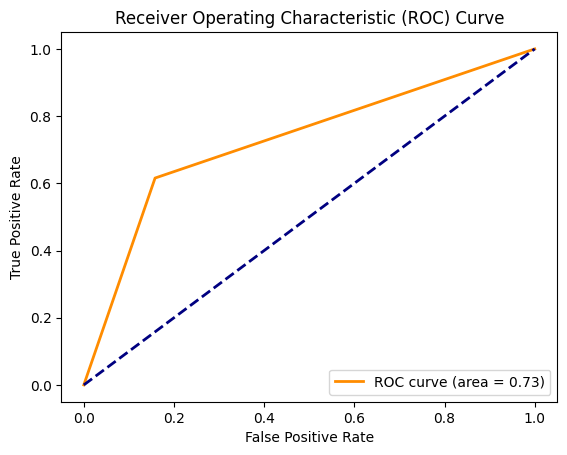

Test Error Rate: 0.24609375


In [ ]:
# Naive Bayes

# fitting the naive bayes model
nb = GaussianNB()
nb.fit(d_train.iloc[:, :-1], d_train.iloc[:, -1])

# pred > 0.5: outcome = 1; pred < 0.5: outcome = 0;
nb_pred = nb.predict(d_train.iloc[:, :-1])
nb_pred = (nb_pred > 0.5).astype(int)

# calculate training error rate
training_error_rate = 1 - accuracy_score(d_train.iloc[:, -1], nb_pred)
print(f'Training Error Rate: {training_error_rate}')

# confusion matrix of training data
nbmatrix_train = confusion_matrix(d_train.iloc[:, -1], nb_pred)
print(nbmatrix_train)

# extract fn, fp, tp, tn
nbfn, nbfp, nbtp, nbtn = nbmatrix_train.ravel()

# Calculate Sensitivity and Specificity
nbsensitivity = nbtp / (nbtp + nbfn)
nbspecificity = nbtn / (nbtn + nbfp)

print(f'Sensitivity: {nbsensitivity}')
print(f'Specificity: {nbspecificity}')

# ROC Curve
nbfpr, nbtpr,_ = roc_curve(d_train.iloc[:, -1], nb_pred)
nbroc_auc = auc(nbfpr, nbtpr)

# plot the curve
plt.figure()
plt.plot(nbfpr, nbtpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % nbroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Estimate test error based on LOOCV

nbCV = []
for i in range(len(d_train)):
  data3 = d_train.drop(d_train.index[i])
  nb = GaussianNB()
  nb.fit(data3.iloc[:, :-1], data3.iloc[:, -1])
  nbtest_pred = nb.predict(d_train.iloc[[i], :-1])
  nbtest_pred = (nbtest_pred > 0.5).astype(int)
  nbtest_error_rate = 1 - accuracy_score(d_train.iloc[[i], -1], nbtest_pred)
  nbCV.append(nbtest_error_rate)

nbCV_np = np.array(nbCV)
nbtest_errorrate = np.mean(nbCV_np)
print(f'Test Error Rate: {nbtest_errorrate}')



#### Logistic Model Proposed

Optimization terminated successfully.
         Current function value: 0.474323
         Iterations 6
Training Error Rate: 0.22526041666666663
[[441  59]
 [114 154]]
Sensitivity: 0.7945945945945946
Specificity: 0.7230046948356808


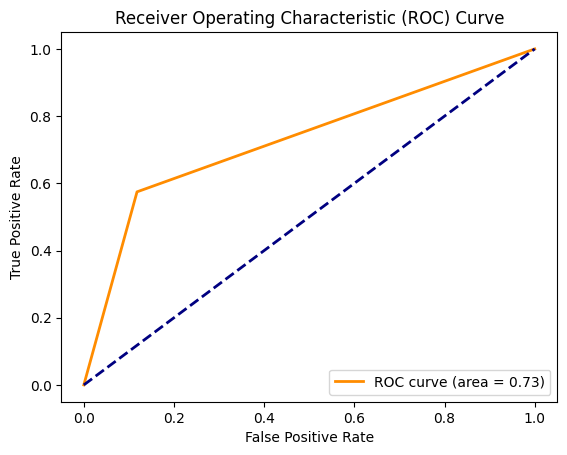

Test Error Rate for Proposed Logistic: 0.23046875


In [ ]:
fit_2 = logit('Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction + BloodPressure', data=d_train).fit()

# predict the training dataset
d_train2 = pd.DataFrame(d_train, columns=['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'BloodPressure', 'Outcome'])
d_train2['Outcome'] = d_train2['Outcome'].astype('category')
dtrain2_pred = fit_2.predict(d_train2.iloc[:, :-1])

# pred > 0.5: outcome = 1; pred < 0.5: outcome = 0;
dtrain2_pred = (dtrain2_pred > 0.5).astype(int)

# calculate training error rate
training_error_rate = 1 - accuracy_score(d_train2.iloc[:, -1], dtrain2_pred)
print(f'Training Error Rate: {training_error_rate}')

lpmatrix = confusion_matrix(d_train2.iloc[:, -1], dtrain2_pred)
print(lpmatrix)

tp, fp, fn, tn = lpmatrix.ravel()

# Calculate Sensitivity and Specificity
psensitivity = tp / (tp + fn)
pspecificity = tn / (tn + fp)

print(f'Sensitivity: {psensitivity}')
print(f'Specificity: {pspecificity}')

# ROC Curve AUC
pfpr, ptpr,_ = roc_curve(d_train2.iloc[:, -1], dtrain2_pred)
proc_auc = auc(pfpr, ptpr)

# plot
plt.figure()
plt.plot(pfpr, ptpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % proc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Estimate test error rate of the model using LOOCV (Own Method)
lpCV = []
for i in range(len(d_train)):
  data3 = d_train.drop(d_train.index[i])
  fit_4 = logit('Outcome ~ Pregnancies + Glucose + BloodPressure + BMI + DiabetesPedigreeFunction', data=data3).fit(disp = False)
  lptest_pred = fit_4.predict(d_train.iloc[i, :-1])
  lptest_pred = (lptest_pred > 0.5).astype(int)
  lptest_error_rate = 1 - accuracy_score(d_train.iloc[[i], -1], lptest_pred)
  lpCV.append(lptest_error_rate)

lpCV_np = np.array(lpCV)
lptest_errorrate = np.mean(lpCV_np)
print(f'Test Error Rate for Proposed Logistic Regression: {lptest_errorrate}')



#### KNN Model

Optimal k: 1
[[500   0]
 [  0 268]]
Sensitivity: 1.0
Specificity: 1.0


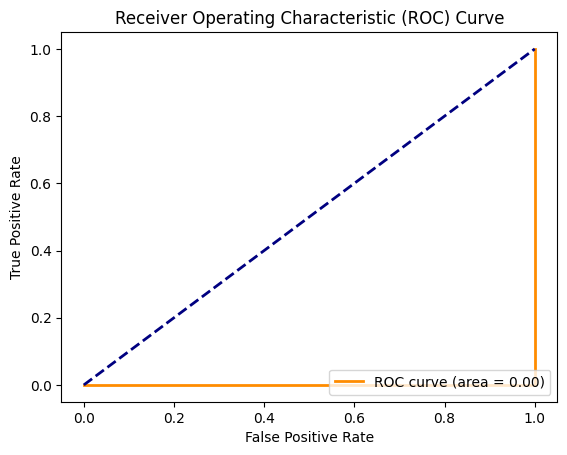

In [ ]:
ks = list(range(1, 10))
kCV = []
for k in ks:
  for i in range(len(d_train)):
    data3 = d_train.drop(d_train.index[i])
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data3.iloc[:, :-1], data3.iloc[:, -1])
    ktest_pred = fit_2.predict(d_train.iloc[i, :-1])
    ktest_pred = (ktest_pred > 0.5).astype(int)
    ktest_error_rate = 1 - accuracy_score(d_train.iloc[[i], -1], ktest_pred)
    kCV.append(ktest_error_rate)

#kCV_np = np.array(kCV)
#ktest_errorrate = np.mean(kCV_np)
optimal_k = ks[np.argmin(kCV)]
print(f'Optimal k: {optimal_k}')

# Fit KNN model using best K
knn = KNeighborsClassifier(n_neighbors= optimal_k)
knn.fit(d_train.iloc[:, :-1], d_train.iloc[:, -1])

# Prediction of training and test data
knn_train = knn.predict(d_train.iloc[:, :-1])
knn_train = (knn_train > 0.5).astype(int)


# Confusion matrix of training and test data
kmatrix_train = confusion_matrix(d_train.iloc[:, -1], knn_train)
print(kmatrix_train)

# Extract fn, fp, tp, tn

tp, fn, fp, tn = kmatrix_train.ravel()

# Calculate Sensitivity and Specificity
ksensitivity = tp / (tp + fn)
kspecificity = tn / (tn + fp)

print(f'Sensitivity: {ksensitivity}')
print(f'Specificity: {kspecificity}')

# ROC CURVE AUC
ktpr, kfpr,_ = roc_curve(d_train.iloc[:, -1], knn_train)
kroc_auc = auc(kfpr, ktpr)

# plot
plt.figure()
plt.plot(kfpr, ktpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % kroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
